<a href="https://colab.research.google.com/github/MateusSanfer/Challenge-Telecom-X-One/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
def processador_dados(json_path):
  df =pd.read_json(json_path)
  campos = ['customer', 'phone', 'internet', 'account']
  dfs_expand = [pd.json_normalize(df[col]) for col in campos]
  return pd.concat([df[['customerID', 'Churn']]] + dfs_expand, axis=1)

dados_limpos = processador_dados('/content/TelecomX_Data.json')

In [5]:
dados_limpos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformação

### **Verificando Inconsistências nos Dados**

In [6]:
dados_limpos.rename(columns={'Charges.Monthly': 'monthly_charges',
                             'Charges.Total': 'total_charges'}, inplace=True)

In [7]:
dados_limpos.columns = (
    dados_limpos.columns
    .str.strip()
    .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
    .str.replace(' ', '_')
    .str.lower()
)

In [34]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


In [12]:
dados_limpos['total_charges'] = dados_limpos['total_charges'].astype(np.float64)

In [13]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

### **Duplicatas**

In [20]:
dados_limpos['customer_id'].duplicated().sum()

np.int64(0)

### **Tipos de dados inconsistentes**

In [21]:
dados_limpos.dtypes

,0
customer_id,object
churn,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object


### **Valores ausentes `(NaN)`**

In [14]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


Verificar quais registros estão com TotalCharges nulo

In [15]:
dados_limpos.query('monthly_charges == 0 | total_charges == 0')

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges


In [16]:
dados_limpos[dados_limpos['total_charges'].isnull()]

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


Como o campo `ternure` está em 0 quer dizer que o cliente acabou de entrar, faz sentido o campo está vazio, por isso como não há um valor informativo útil de `TotalCharges`, e preencher com 0 poderia criar um dado falso. resolvi remover os 11 registros com dados ausentes no `TotalCharges`.

In [17]:
dados_limpos = dados_limpos.dropna(subset=['total_charges'])

In [18]:
dados_limpos.isnull().sum()

,0
customer_id,0
churn,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0


### **Erros de formatação em categorias**

In [22]:
for col in dados_limpos.select_dtypes(include='object').columns:
    print(f"{col}: {dados_limpos[col].unique()}")


customer_id: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phone_service: ['Yes' 'No']
multiple_lines: ['No' 'Yes' 'No phone service']
internet_service: ['DSL' 'Fiber optic' 'No']
online_security: ['No' 'Yes' 'No internet service']
online_backup: ['Yes' 'No' 'No internet service']
device_protection: ['No' 'Yes' 'No internet service']
tech_support: ['Yes' 'No' 'No internet service']
streaming_tv: ['Yes' 'No' 'No internet service']
streaming_movies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperless_billing: ['Yes' 'No']
payment_method: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [33]:
dados_limpos[dados_limpos['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias


In [24]:
dados_limpos = dados_limpos[dados_limpos['churn'] != '']

In [25]:
dados_limpos[dados_limpos['churn'] == '']

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges


### **Inconsistências nas categorias**

In [26]:
dados_limpos['senior_citizen'].value_counts()

,count
senior_citizen,
0,5890
1,1142


In [27]:
dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] /30

<ipython-input-27-00d358ad21a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos['contas_diarias'] = dados_limpos['monthly_charges'] /30


In [28]:
dados_limpos[['monthly_charges', 'contas_diarias']].head(10)

,monthly_charges,contas_diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
5,69.40,2.313333
6,109.70,3.656667
7,84.65,2.821667
8,48.20,1.606667
9,90.45,3.015000


In [29]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   object 
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   object 
 5   dependents         7032 non-null   object 
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   object 
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

### **Padronização**

In [30]:
cols_sim_nao = ['churn', 'partner', 'dependents', 'phone_service', 'paperless_billing']

dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})

<ipython-input-30-ab56b64746d2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})
<ipython-input-30-ab56b64746d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos[cols_sim_nao] = dados_limpos[cols_sim_nao].replace({'Yes': 1, 'No': 0})


In [ ]:
no_service_cols = [
    'multiple_lines', 'online_security', 'online_backup',
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

# Substitui "No internet service" e "No phone service" por "No"
dados_limpos[no_service_cols] = dados_limpos[no_service_cols].replace({
    'No internet service': 'No', 'No phone service': 'No'
})

In [31]:
dados_limpos.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [32]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

#📊 Carga e análise

### **Análise Descritiva**

**Estatísticas descritivas para os dados numéricos:**

In [35]:
dados_limpos.describe()


,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


📌 1. **Proporção de Evasão (Churn)**

Média (churn): 0.265 → Cerca de 26,6% dos clientes cancelaram o serviço.

> 💡 *Essa taxa é relativamente alta, indicando um problema significativo de retenção.*


📌 2. **Tempo como Cliente (tenure)**

Média: 32,42 meses

Mediana: 29 meses

Máximo: 72 meses

Mínimo: 1 mês

> *💡 Boa parte dos clientes permanece por mais de 2 anos, mas também há muitos com permanência muito curta, o que pode sugerir rotatividade precoce em certos perfis.*

📌 3. **Gastos Mensais e Totais**
```
Variável	Média	Mediana	Mínimo	Máximo
monthly_charges	R$ 64,80	R$ 70,35	R$ 18,25	R$ 118,75
total_charges	R$ 2.283,30	R$ 1.397,48	R$ 18,80	R$ 8.684,80
contas_diarias	R$ 2,16	R$ 2,35	R$ 0,61	R$ 3,96
```
> *💡 Clientes com mensalidades mais altas tendem a ter maior risco de evasão. Essa hipótese pode ser testada nas próximas análises.*

📌 4. **Perfil Demográfico e de Serviço**

Idosos (senior_citizen): Apenas 16% dos clientes têm 65 anos ou mais.

Com parceiro(a): ~48%

Com dependentes: ~30%

Com serviço telefônico: ~90%

Fatura digital (paperless_billing): ~59%

>*💡 A maioria dos clientes não é idosa, não tem dependentes e utiliza cobrança digital. Esses fatores podem ter relação com o churn dependendo da combinação com outras variáveis (como tipo de contrato ou método de pagamento).*

 Análise da coluna `tenure` (tempo como cliente)

 Avalia o tempo médio e mediano que os clientes permanecem na empresa. Essa métrica é útil para entender a fidelidade média dos clientes e se há tendência de evasão em ciclos curtos.

In [40]:
print(f"Tempo médio como cliente: {dados_limpos['tenure'].mean():.2f}")
print(f"Mediana do tempo:  {dados_limpos['tenure'].median():.2f}")


Tempo médio como cliente: 32.42
Mediana do tempo:  29.00


Investigar o valor financeiro investido pelos clientes mensalmente e ao longo de sua jornada. Faturas muito altas podem indicar risco de evasão, enquanto valores baixos podem sugerir menor engajamento.

In [41]:
print(f"Fatura mensal média: {dados_limpos['monthly_charges'].mean():.2f}")
print(f"Gasto total médio: {dados_limpos['total_charges'].mean():.2f}")


Fatura mensal média: 64.80
Gasto total médio: 2283.30


Identifica a proporção de clientes que permaneceram vs. cancelaram o serviço. Essa métrica é crucial para entender o problema: quanto maior a taxa de evasão, maior a necessidade de estratégias de retenção.

Distribuição do churn

In [42]:
dados_limpos['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


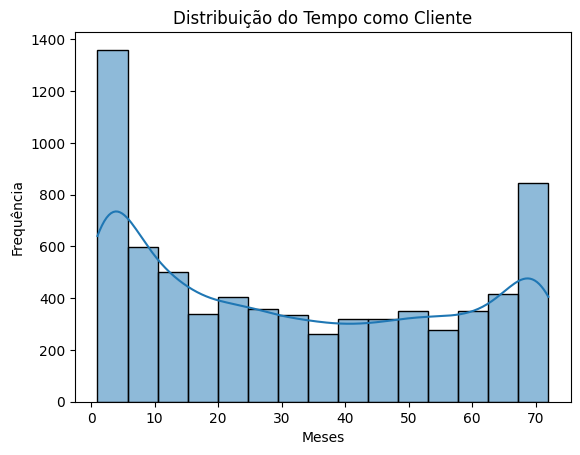

In [43]:
sns.histplot(dados_limpos['tenure'], kde=True)
plt.title("Distribuição do Tempo como Cliente")
plt.xlabel("Meses")
plt.ylabel("Frequência")
plt.show()


### **Distribuição da Evasão**

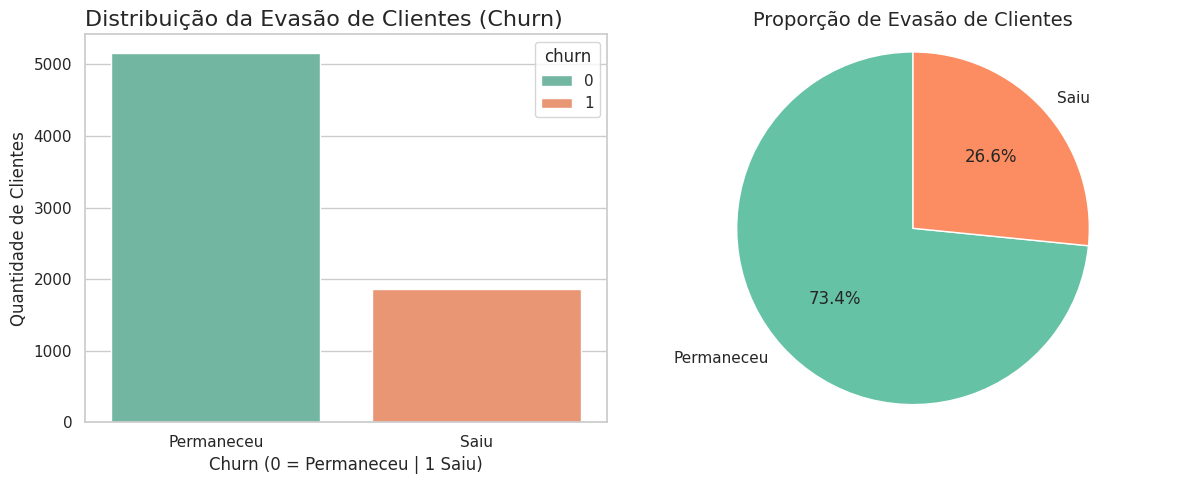

In [76]:
churn_counts = dados_limpos['churn'].value_counts()
labels = ['Permaneceu', 'Saiu']
colors = ['#66c2a5', '#fc8d62']

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='churn', data=dados_limpos, hue='churn', palette='Set2', ax=axes[0])
axes[0].set_title('Distribuição da Evasão de Clientes (Churn)', loc='left', fontsize=16)
axes[0].set_xlabel('Churn (0 = Permaneceu | 1 Saiu)', fontsize=12)
axes[0].set_ylabel('Quantidade de Clientes', fontsize=12)
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(labels)


axes[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proporção de Evasão de Clientes', fontsize=14)
axes[1].axis('equal')

plt.tight_layout()
plt.show()

📊 **Visualização da Evasão de Clientes (Churn)**

A seguir, apresentamos dois gráficos que ilustram a distribuição da variável churn, responsável por indicar se o cliente deixou ou permaneceu na empresa:

Gráfico de Barras: mostra a contagem absoluta de clientes que saíram (1) e que permaneceram (0).

Gráfico de Pizza: mostra a proporção percentual entre os dois grupos.

Distribuição Absoluta	Distribuição Percentual

> *📌 Os gráficos acima revelam que cerca de 26,6% dos clientes saíram da empresa, enquanto 73,4% permaneceram.*

In [80]:

def plot_churn_proportion(col):
    # Calcula a proporção de churn por categoria
    prop_df = dados_limpos.groupby(col)['churn'].mean().reset_index()

    # Ordena do maior pro menor churn
    prop_df = prop_df.sort_values('churn', ascending=False)

    # Plota
    plt.figure(figsize=(7, 4))
    sns.barplot(data=prop_df, x=col, y='churn', palette='Reds')
    plt.title(f'Proporção de Evasão por {col.replace("_", " ").title()}', fontsize=14)
    plt.ylabel('Proporção de Churn')
    plt.xlabel(col.replace("_", " ").title())
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


<ipython-input-80-042b2dae2284>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_df, x=col, y='churn', palette='Reds')


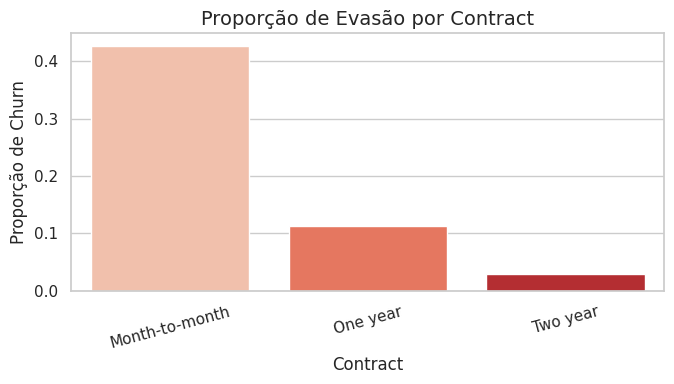

<ipython-input-80-042b2dae2284>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_df, x=col, y='churn', palette='Reds')


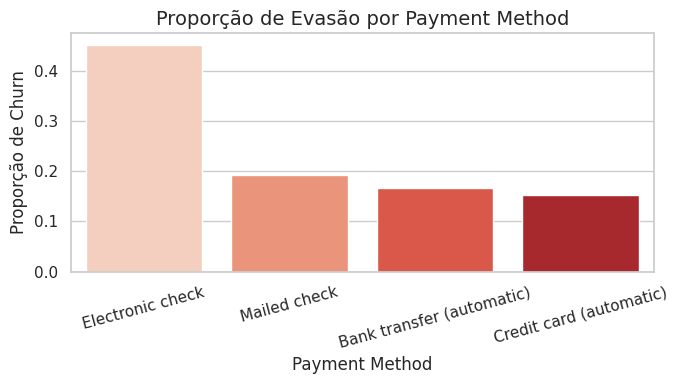

<ipython-input-80-042b2dae2284>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_df, x=col, y='churn', palette='Reds')


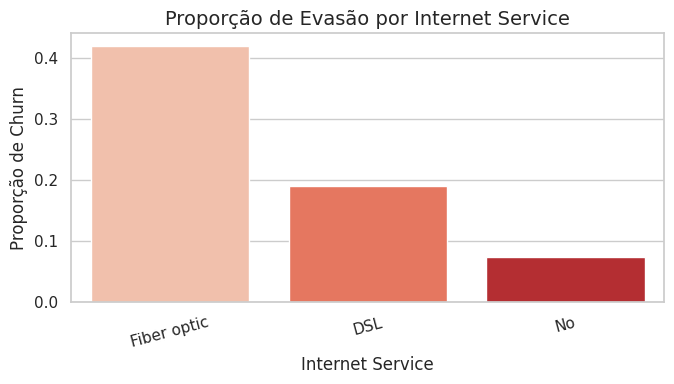

In [81]:
plot_churn_proportion('contract')
plot_churn_proportion('payment_method')
plot_churn_proportion('internet_service')


In [87]:

def plot_churn_by_category(col):
    plt.figure(figsize=(7, 4))
    sns.countplot(data=dados_limpos, x=col, hue='churn', palette='Set2')
    plt.title(f'Churn por {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Quantidade de Clientes')
    plt.legend(title='Churn', labels=['Permaneceu', 'Saiu'])
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


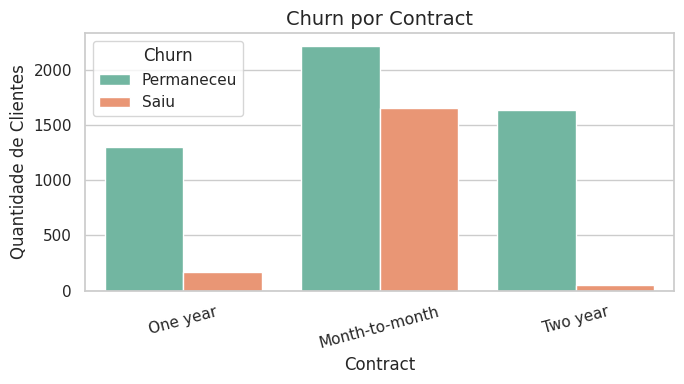

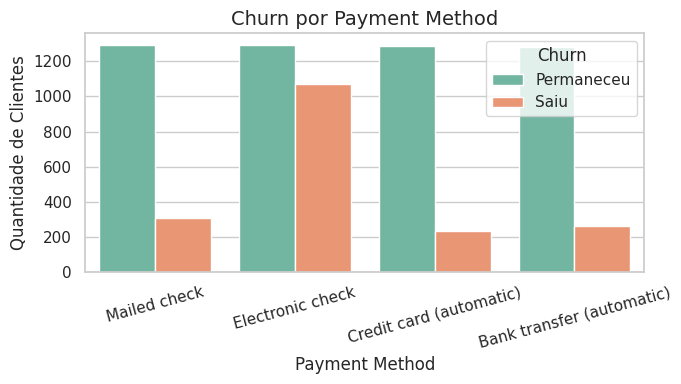

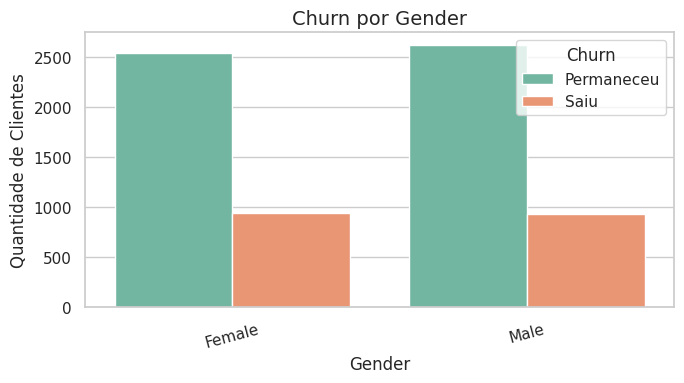

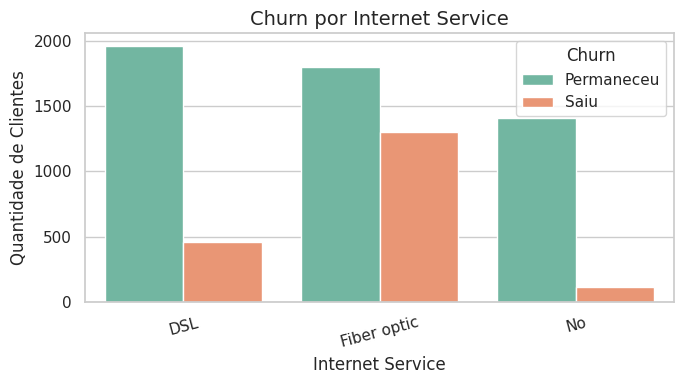

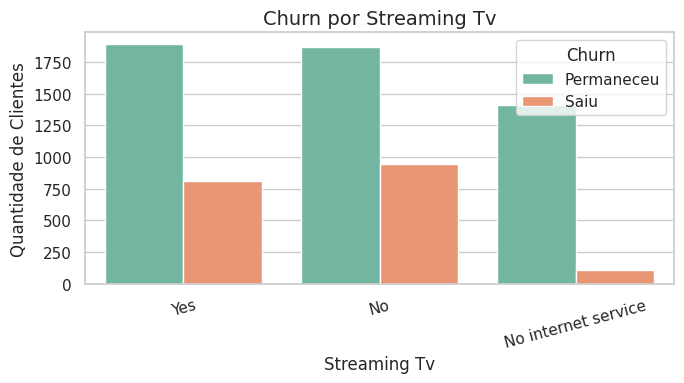

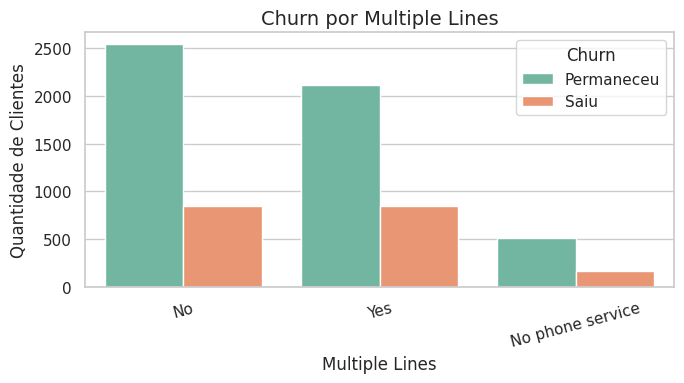

In [89]:
plot_churn_by_category('contract')
plot_churn_by_category('payment_method')
plot_churn_by_category('gender')
plot_churn_by_category('internet_service')
plot_churn_by_category('streaming_tv')
plot_churn_by_category('multiple_lines')



In [90]:
# Dicionário para rótulos legíveis
nomes_legiveis = {
    'gender': 'Gênero',
    'contract': 'Tipo de Contrato',
    'payment_method': 'Forma de Pagamento',
    'internet_service': 'Serviço de Internet',
    'streaming_tv': 'Streaming de TV',
    'multiple_lines': 'Linhas Telefônicas',
    'churn': 'Evasão',
}


In [91]:
import plotly.express as px

def plot_churn_plotly(col):
    # Substitui os valores binários para legenda
    dados_plot = dados_limpos.copy()
    dados_plot['churn'] = dados_plot['churn'].replace({0: 'Permaneceu', 1: 'Saiu'})

    fig = px.histogram(
        dados_plot,
        x=col,
        color='churn',
        barmode='group',
        text_auto=True,
        color_discrete_map={'Permaneceu': '#66c2a5', 'Saiu': '#fc8d62'},
        labels={
            col: nomes_legiveis.get(col, col).title(),
            'churn': 'Status do Cliente'
        }
    )

    fig.update_layout(
        title=f'Evasão por {nomes_legiveis.get(col, col).title()}',
        xaxis_title=nomes_legiveis.get(col, col).title(),
        yaxis_title='Quantidade de Clientes',
        legend_title='Status',
        bargap=0.2
    )

    fig.show()


In [92]:
plot_churn_plotly('contract')
plot_churn_plotly('payment_method')
plot_churn_plotly('gender')
plot_churn_plotly('internet_service')
plot_churn_plotly('streaming_tv')
plot_churn_plotly('multiple_lines')


In [94]:
dados_limpos.to_json('TelecomX_BR.json')
df_tele = pd.read_json('/content/TelecomX_BR.json')

In [95]:
df_tele

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [96]:
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 non-n

#📄Relatorio Final